## Getting Started
Let's start a new session. **Replace client id and secret placeholders with actual values.**

In [1]:
%matplotlib inline

from gs_quant.session import Environment, GsSession
import pprint as pp

# session = AppSession('CLIENT_ID', 'CLIENT_SECRET', Environment.PROD)
GsSession.use(Environment.QA)

Retrieve information about a dataset from the catalog.

In [2]:
from gs_quant.data import Dataset
from gs_quant.api.gs.data import GsDataApi
dataset = Dataset('EDRVOL_PERCENT_SHORT')
definition = GsDataApi.get_definition(dataset)
pp.pprint(definition)  # show selected metadata

Find out what assets are included in the dataset.

In [3]:
coverage = GsDataApi.get_coverage(dataset)
pp.pprint(coverage[:3])  # show the first 3 covered assets

[{'assetId': 'MA4B66MW5E27U8NN8ST',
  'bbid': 'DJX',
  'description': '',
  'name': 'Dow Jones Indu Avg'},
 {'assetId': 'MA2NWD8Y5ZC3T6A8',
  'bbid': 'TPNBNK',
  'description': '',
  'name': 'TOPIX Banks Index'},
 {'assetId': 'MA4B66MW5E27U8P32DZ',
  'bbid': 'MCXP',
  'description': '',
  'name': 'STXE Mid 200 EUR PR'}]


## Retrieving a Data Table
Get data as a Pandas DataFrame. Note: this example will not work if you do not have access to EDRVOL_PERCENT_SHORT.

In [4]:
from datetime import date
df = dataset.get_data(date(2018, 1, 2), date(2018, 1, 9), ric='.SPX', relativeStrike=1)
df.head()

,absoluteStrike,assetId,date,impliedVolatility,relativeStrike,ric,strikeReference,tenor,updateTime
0,2703.422973,MA4B66MW5E27U8P32SB,2018-01-02,0.124072,1.0,.SPX,forward,9m,2019-01-14T13:10:23Z
1,2697.130446,MA4B66MW5E27U8P32SB,2018-01-02,0.091925,1.0,.SPX,forward,3m,2019-01-14T13:10:23Z
2,2702.229408,MA4B66MW5E27U8P32SB,2018-01-02,0.121056,1.0,.SPX,forward,8m,2019-01-14T13:10:23Z
3,2702.714955,MA4B66MW5E27U8P32SB,2018-01-02,0.117516,1.0,.SPX,forward,7m,2019-01-14T13:10:23Z
4,2695.790000,MA4B66MW5E27U8P32SB,2018-01-02,0.118894,1.0,.SPX,spot,7m,2019-01-14T13:10:23Z


## Retrieving a Data Series
Get S&P 500 prices as a Pandas Series. Note: this example will not work if you do not have access to TREOD.

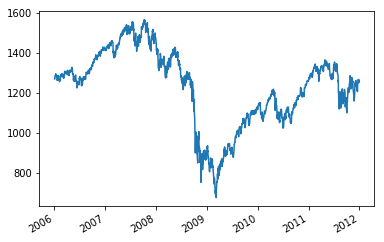

In [5]:
import matplotlib.pyplot as plt
from datetime import date
dataset = Dataset('TREOD')
series = dataset.get_data_series('tradePrice', date(2006, 1, 1), date(2012, 1, 1), assetId='MA4B66MW5E27U8P32SB')
plt.clf()
series.plot()
plt.show()


Calculate max drawdown and plot it.

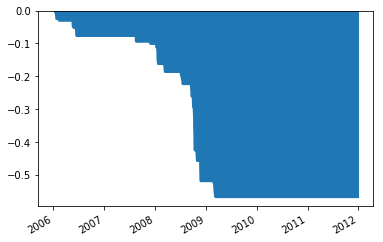

In [6]:
import gs_quant.timeseries as ts  # timeseries functions do not require an open session
mdd = ts.max_drawdown(series)
plt.clf()
mdd.plot('area')
plt.show()

## Identifier Mapping
Map identifiers from one type to another e.g. Marquee asset ID to BBID.

In [7]:
from gs_quant.api.gs.assets import GsAssetApi
ids = GsAssetApi.map_identifiers('id', 'bbid', ['MA4B66MW5E27U8P32SB', 'MA4B66MW5E27U8NN95P', 'MA4B66MW5E27UAHKG34'])
pp.pprint(ids)

TypeError: map_identifiers() missing 1 required positional argument: 'ids'

## Cleaning Up

When finished, call session.finish() to free up resources. Alternatively, use 'with' syntax to take care of this automatically.

In [ ]:
dataset = Dataset('TREOD')

with GsSession.get(Environment.PROD):
    # session is open in this block
    series = dataset.get_data_series('tradePrice', date(2006, 1, 1), date(2012, 1, 1), assetId='MA4B66MW5E27U8P32SB')

# session is closed out here
mdd = ts.max_drawdown(series)
mdd.head()